# Introduction to Data Science, CS 5963 / Math 3900
## Lecture 5: Linear Regression

Introductory demo for Linear Regression

There are several different python packages that do regression:
1. [SciPy](http://www.scipy.org/)
+ [Statsmodels](http://statsmodels.sourceforge.net/)
+ [scikit-learn](http://scikit-learn.org/)
+ ... 

Today, we'll just use the linregress function in the scipy.stats library.


## Example dataset
To illustrate linear regression, we'll use the 'Advertising' dataset from
[here](http://www-bcf.usc.edu/~gareth/ISL/data.html)


For 200 different ‘markets’ (think different cities), this dataset consists of the number of sales of a particular product as well as the advertising budget for different media: TV, radio, and newspaper. 

We’ll use linear regression to study the effect of advertising on sales. 
Here, sales is the dependent variable and the budgets are the independent variables. 

This might help inform or evaluate an advertising strategy for this product.  

In [1]:
import pandas as pd
import scipy as sc
from scipy.stats import linregress

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

advert = pd.read_csv('Advertising.csv',index_col=0) #load data
print(advert)

Sales = advert['Sales'].tolist()
TV_budget=advert['TV'].tolist()
Radio_budget=advert['Radio'].tolist()
Newspaper_budget=advert['Newspaper'].tolist()

        TV  Radio  Newspaper  Sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
6      8.7   48.9       75.0    7.2
7     57.5   32.8       23.5   11.8
8    120.2   19.6       11.6   13.2
9      8.6    2.1        1.0    4.8
10   199.8    2.6       21.2   10.6
11    66.1    5.8       24.2    8.6
12   214.7   24.0        4.0   17.4
13    23.8   35.1       65.9    9.2
14    97.5    7.6        7.2    9.7
15   204.1   32.9       46.0   19.0
16   195.4   47.7       52.9   22.4
17    67.8   36.6      114.0   12.5
18   281.4   39.6       55.8   24.4
19    69.2   20.5       18.3   11.3
20   147.3   23.9       19.1   14.6
21   218.4   27.7       53.4   18.0
22   237.4    5.1       23.5   12.5
23    13.2   15.9       49.6    5.6
24   228.3   16.9       26.2   15.5
25    62.3   12.6       18.3    9.7
26   262.9    3.5       19.5   12.0
27   142.9   29.3       12.6

# Plot and describe the data

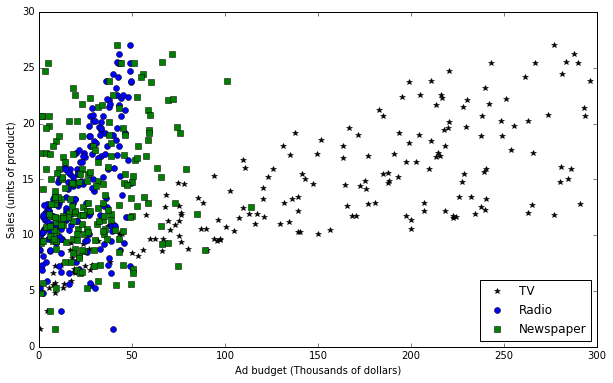

In [2]:
plt.plot(TV_budget,Sales,'k*',label='TV')
plt.plot(Radio_budget,Sales,'bo',label='Radio')
plt.plot(Newspaper_budget,Sales,'gs',label='Newspaper')

plt.legend(numpoints=1,loc=4)
plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel('Sales (units of product)')
plt.show()

In [3]:
print(advert['Sales'].describe(), '\n')
print(advert['TV'].describe(), '\n')
print(advert['Radio'].describe(), '\n')
print(advert['Newspaper'].describe(), '\n')

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64 

count    200.000000
mean     147.042500
std       85.854236
min        0.700000
25%       74.375000
50%      149.750000
75%      218.825000
max      296.400000
Name: TV, dtype: float64 

count    200.000000
mean      23.264000
std       14.846809
min        0.000000
25%        9.975000
50%       22.900000
75%       36.525000
max       49.600000
Name: Radio, dtype: float64 

count    200.000000
mean      30.554000
std       21.778621
min        0.300000
25%       12.750000
50%       25.750000
75%       45.100000
max      114.000000
Name: Newspaper, dtype: float64 



## Observations 
1. From the plot, it is clear that there is a relationship between the advertising budgets and sales. The more money spent, the larger the number of sales. 
+  The most money was spent on TV advertising. The amount for Radio and Newspaper is about the same in all markets.

## Questions
1. How can we quantify the relationship between advertising and sales? Can we predict the effect of each ad media on sales? Is the relationship linear? 
+  Which of the different ad media (TV, Radio, Newspaper) are the most effective at generating sales? 
+  Are there interactions between the different ad media? (more complicated, not today)

First, let's just look at the effect of TV advertising on sales. 

LinregressResult(slope=0.047536640433019701, intercept=7.0325935491277018, rvalue=0.78222442486160626, pvalue=1.4673897001948012e-42, stderr=0.0026906071877968703)


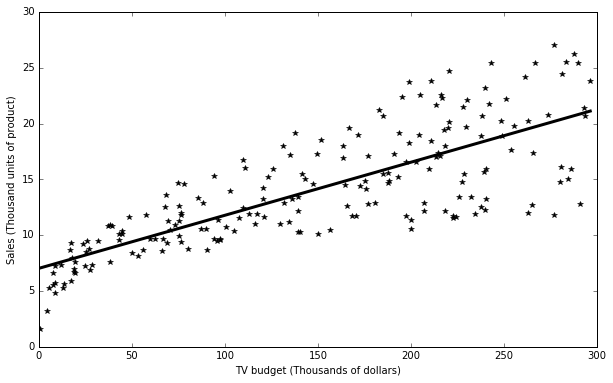

The model is:   y   = beta_0 + beta_1 * x
              Sales = 7.0326 + 0.0475 * TV_budget.
r-squared value = 0.6119 (measure of fit)
p-value = 0.0 (H_0: slope is zero.)
standard error = 0.0027


In [6]:
lr_tv_sales = linregress(x=TV_budget, y=Sales)
print(lr_tv_sales)
# lr_tv_sales is an object containing the linear regression information: 
# slope, intercept, r_value, p_value, std_err

plt.plot(TV_budget,Sales,'k*')

x = sc.linspace(0,max(TV_budget),1000)
plt.plot(x,lr_tv_sales.intercept + lr_tv_sales.slope*x,'k',linewidth=3)
plt.xlabel('TV budget (Thousands of dollars)')
plt.ylabel('Sales (Thousand units of product)')
plt.show()

print('The model is:   y   = beta_0 + beta_1 * x') 
print('              Sales = ' + str(round(lr_tv_sales.intercept,4)) + ' + ' + str(round(lr_tv_sales.slope,4)) + ' * TV_budget.')
print("r-squared value = " + str(round(lr_tv_sales.rvalue**2,4)) + " (measure of fit)")
print("p-value = " + str(round(lr_tv_sales.pvalue,4)) + " (H_0: slope is zero.)")
print("standard error = " + str(round(lr_tv_sales.stderr,4)))

## Discussion

The slope of the line is 0.0475. This means that the model predicts that for every additional $1k spent on TV advertising, an additional 47.5 units of product are sold. 

The intercept of the line is 7.032. This means that without any TV advertising, the model predicts that 7,032 units of product will be sold. 

*What is the standard error or residual standard error (RSE)?* This is just the quantity
$$
RSE = \sqrt{\frac{1}{n-2} \sum_{i=1}^n (y_i - \hat\beta_0 - \hat\beta_1 x_i)^2}
$$
Remember that we chose $\hat\beta_0$ and $\hat\beta_1$ to minimize the squared RSE. In this case, we interpret the RSE to mean that the actual sales deviates from the regression line by 2,690 units of product on average. If this number is very small, then the model fits the data very well. 

How small is small?...good question. The number for one model is difficult to interpret. The RSE is a good measure if you have several different models (not just linear regression) and you want to compare them on the data.   

*What is the $R^2$ value?* The $R^2$-value is an alternative way to measure how good of a fit the model is to the data. The benefit of the $R^2$-value over the RSE is that it is a proportion (takes values between 0 and 1) so it is easier to interpret what a *good* value is. We first define the residual sum of squares (RSS) and total sum of squares (TSS) by
$$
RSS = \sum_{i=1}^n (y_i - \hat\beta_0 - \hat\beta_1 x_i)^2
\qquad \text{and} \qquad 
TSS = \sum_{i=1}^n (y_i - \bar y)^2. 
$$
RSS measures the amount of variability left unexplained after the linear regression. TSS measures the total variance in the data. We compute the $R^2$ value as
$$
R^2 = \frac{TSS - RSS}{TSS}.
$$
This is the proportion of the variance explained by the model. A model is good if the $R^2$ value is nearly one (the model explains all of the variance in the data). A value of 0.61 isn't bad. The model explains $61\%$ of the variability in sales. 

Note: for linear regression, the $R^2$ value is the same as correlation, but the $R^2$ value more easily generalizes to more complicated regression models than correlation, so the $R^2$ value is typically considered instead of correlation. 

*What is the p-value?* There is the p-value from a hypothesis test that can be used to evaluate whether there is a relationship between the two variables. More on this in a future lecture...

The model is:   y   = beta_0 + beta_1 * x
              Sales = 9.3116 + 0.2025 * Radio_budget.
r-squared value = 0.332 (measure of fit)
p-value = 0.0 (H_0: slope is zero.)
standard error = 0.0204


The model is:   y   = beta_0 + beta_1 * x
              Sales = 12.3514 + 0.0547 * Newspaper_budget.
r-squared value = 0.0521 (measure of fit)
p-value = 0.0011 (H_0: slope is zero.)
standard error = 0.0166


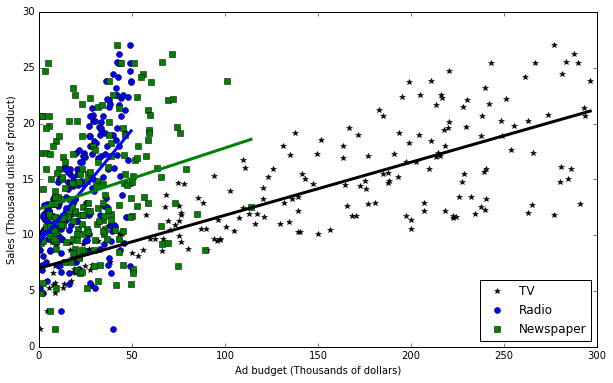

In [7]:
lr_radio_sales = linregress(x=Radio_budget, y=Sales)

print('The model is:   y   = beta_0 + beta_1 * x') 
print('              Sales = ' + str(round(lr_radio_sales.intercept,4)) + ' + ' + str(round(lr_radio_sales.slope,4)) + ' * Radio_budget.')
print("r-squared value = " + str(round(lr_radio_sales.rvalue**2,4)) + " (measure of fit)")
print("p-value = " + str(round(lr_radio_sales.pvalue,4)) + " (H_0: slope is zero.)")
print("standard error = " + str(round(lr_radio_sales.stderr,4)))
print("\n")

lr_news_sales = linregress(x=Newspaper_budget, y=Sales)
print('The model is:   y   = beta_0 + beta_1 * x') 
print('              Sales = ' + str(round(lr_news_sales.intercept,4)) + ' + ' + str(round(lr_news_sales.slope,4)) + ' * Newspaper_budget.')
print("r-squared value = " + str(round(lr_news_sales.rvalue**2,4)) + " (measure of fit)")
print("p-value = " + str(round(lr_news_sales.pvalue,4)) + " (H_0: slope is zero.)")
print("standard error = " + str(round(lr_news_sales.stderr,4)))

plt.plot(TV_budget,Sales,'k*',label='TV')
plt.plot(Radio_budget,Sales,'bo',label='Radio')
plt.plot(Newspaper_budget,Sales,'gs',label='Newspaper')
plt.legend(numpoints=1,loc=4)

x = sc.linspace(0,max(TV_budget),1000)
plt.plot(x,lr_tv_sales.intercept + lr_tv_sales.slope*x,'k',linewidth=3)

x = sc.linspace(0,max(Radio_budget),1000)
plt.plot(x,lr_radio_sales.intercept + lr_radio_sales.slope*x,'b',linewidth=3)

x = sc.linspace(0,max(Newspaper_budget),1000)
plt.plot(x,lr_news_sales.intercept + lr_news_sales.slope*x,'g',linewidth=3)

plt.xlabel('Ad budget (Thousands of dollars)')
plt.ylabel('Sales (Thousand units of product)')
plt.show()

## Discussion

*So what is the most effective advertising media?*

The slope for radio is largest, so you might argue that this is the most effective advertising media. For every additional \$1k spent on Radio advertising, an additional 202 units of product are sold. (Compare to 54.7 for newspaper and 47.5 for TV.)

On the other hand, the $R^2$ value for radio is just $33\%$. So the model isn't explaining as much of the data as the model for TV advertising ($R^2 = 61\%$), but is explaining more than the model for newspaper advertising ($R^2 = 5\%). 

The main problem with the approach here is that for each advertising media we look at, we're ignoring the ads in the other media. For example in the model for TV advertising, 
$$
Sales = \beta_0 + \beta_1 * TV,
$$
we're ignoring both Radio and Newspaper advertising. 

We need to take all three into account at once. Maybe we can construct a model that looks like 
$$
Sales = \beta_0 + \beta_1 * TV + \beta_2*Radio + \beta_3*Newspaper. 
$$
This is the idea behind Multiple Linear Regression. More on this next time. 